In [2]:
!pip install ucimlrepo
!pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 

  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

print(X)


     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

In [4]:
print(y)

      mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]


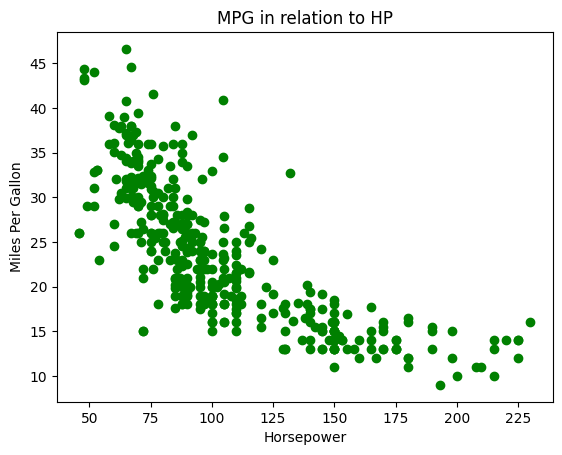

In [7]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


import matplotlib.pyplot as plt

# Feature die zal gebruikt worden is in dit geval HP
feature_to_plot = X[:, 2]

plt.scatter(feature_to_plot, y, color='green')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.title('MPG in relation to HP')
plt.show()

In [17]:
#Feature to plot moet gereshaped worden om te kunnen gebruiken
model = LinearRegression().fit(feature_to_plot.reshape(-1, 1), y)

In [10]:
r_sq = model.score(feature_to_plot.reshape(-1, 1), y)
print('Coefficient of determination of R² =', r_sq)
print('Intercept b:', model.intercept_)
print('Slope m:', model.coef_)

Coefficient of determination of R² = 0.5951152532609462
Intercept b: [40.00451552]
Slope m: [[-0.15784473]]


In [11]:
y_pred = model.predict(feature_to_plot.reshape(-1, 1))

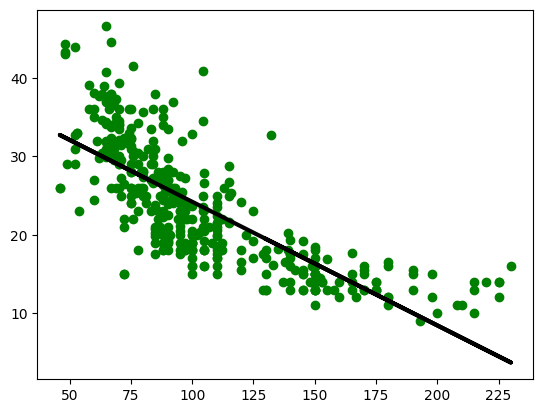

In [13]:
import matplotlib.pyplot as plt

plt.scatter(feature_to_plot.reshape(-1, 1), y, color='green')
plt.plot(feature_to_plot.reshape(-1, 1), y_pred, color='black', linewidth=3)
plt.show()

In [14]:
print('Predicted responses:', y_pred)

Predicted responses: [[19.48470018]
 [13.96013451]
 [16.32780552]
 [16.32780552]
 [17.90625285]
 [ 8.75125831]
 [ 5.27867418]
 [ 6.06789785]
 [ 4.48945051]
 [10.01401618]
 [13.17091085]
 [14.74935818]
 [16.32780552]
 [ 4.48945051]
 [25.00926585]
 [25.00926585]
 [24.69357638]
 [26.58771318]
 [26.11417898]
 [32.74365778]
 [26.27202372]
 [25.79848952]
 [25.00926585]
 [22.16806065]
 [25.79848952]
 [ 6.06789785]
 [ 8.43556885]
 [ 6.85712151]
 [ 9.54048198]
 [26.11417898]
 [25.79848952]
 [25.00926585]
 [23.51457286]
 [24.22004218]
 [23.43081852]
 [24.22004218]
 [26.11417898]
 [24.22004218]
 [13.96013451]
 [12.38168718]
 [15.85427132]
 [16.32780552]
 [11.59246351]
 [13.17091085]
 [12.38168718]
 [22.64159485]
 [28.63969472]
 [24.22004218]
 [26.11417898]
 [26.42986845]
 [25.79848952]
 [28.95538418]
 [28.00831578]
 [29.74460785]
 [29.11322892]
 [30.53383152]
 [28.95538418]
 [25.00926585]
 [27.37693685]
 [31.48089992]
 [25.79848952]
 [26.42986845]
 [13.96013451]
 [12.38168718]
 [16.32780552]
 [15

In [18]:
#Vul het aantal HP (PK) van een auto in
mpg = model.predict([[77]])

In [20]:
#Print hoeveel Miles per Gallon deze auto zal halen
print(mpg)

[[27.85047105]]
